In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import time
import random

datos = pd.read_csv("Spectra20.csv", header=None)
X = datos[[0]].values
Y = datos[[1]].values

def gaussian(r, sigma=1):
    """
        Implementacion de Gaussian Function
    """
    return np.exp(- ( np.linalg.norm(r)**2 ) / ( 2 * (sigma ** 2)))



In [2]:
class AU:
    def __init__(self, n_entrada, n_oculta, entradas, respuestas, landa = 0, bias=0):

        self.n_entrada = n_entrada
        self.n_oculta = n_oculta
        self.entradas = entradas
        self.respuestas = respuestas
        self.salida = None
        self.bias = bias 
        
        # Construir la matriz G
        self.G = np.zeros((n_entrada,n_entrada))
        for i in range(n_entrada):
            for j in range(n_entrada):
                self.G[i][j] = gaussian(entradas[i] - entradas[j])
                
        
        # Regularizacion
        self.G = self.G + landa * np.identity(n_entrada)
        
        inversa = np.linalg.inv(self.G)
        self.pesos = np.dot(inversa,respuestas)
        
        
    def calcular(self, x):
        F = 0
        # Calculamos los phi de cada neurona de la capa oculta
        # multiplicado por lo pesos previamente encontrados
        for i in range(self.n_entrada):
            F += self.pesos[i] * gaussian(x - self.entradas[i])
            
        F += self.bias
        return F
    

In [3]:
def verificar(au):
    error = 0
    y_salida= []
    for x in range(X.shape[0]):
        y = au.calcular(X[x])
        y_salida.append(y)
        err = Y[x] - y
        error += err ** 2
        
    error /= 2
    
    print("Error: ", error)
    
    plt.plot(X,Y,'ro', X, y_salida, 'b-')
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.legend(["Puntos Dados", "Pesos Obtenidos"])
    plt.show()

#### Prueba de Datos sin parametro de regularizacion

Error:  [0.36133902]


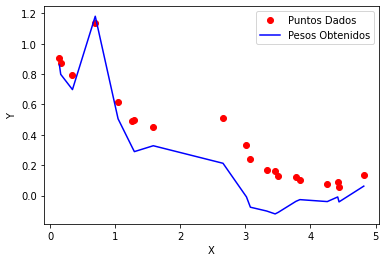

In [4]:
au = AU(20,20,X, Y)
verificar(au)

Error:  [0.11132676]


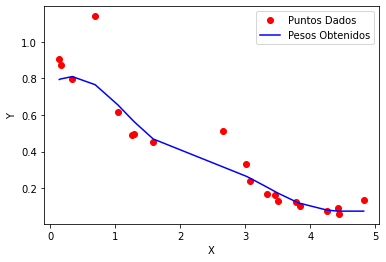

In [5]:
au = AU(20,20,X, Y, 0.5)
verificar(au)

Error:  [0.0876956]


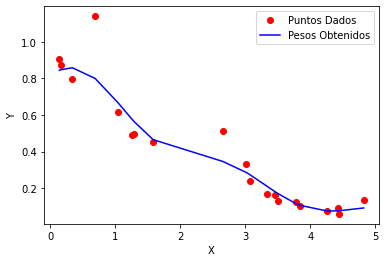

In [6]:
au = AU(20,20,X, Y, 0.25)
verificar(au)

Error:  [0.06436814]


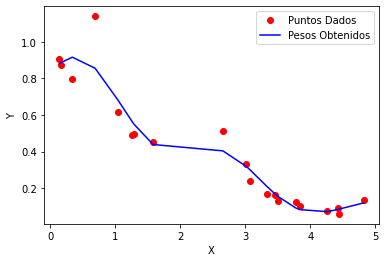

In [7]:
au = AU(20,20,X, Y, 0.05)
verificar(au)

Error:  [0.05114579]


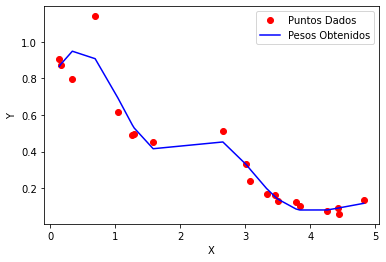

In [8]:
au = AU(20,20,X, Y, 0.01)
verificar(au)

Error:  [0.04073801]


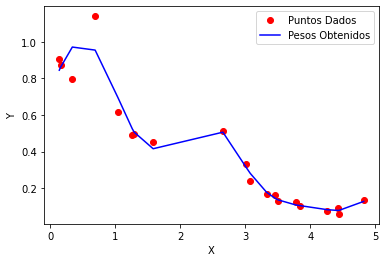

In [9]:
au = AU(20,20,X, Y, 0.001)
verificar(au)

Error:  [0.03083171]


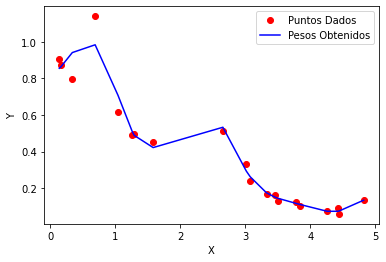

In [10]:
au = AU(20,20,X, Y, 0.0001)
verificar(au)

#### Conclusiones

Vemos que la prueba con el parametro de regularizacion igualado 0 nos aproxima ciertos puntos correctamente, otros un poco desfasado, sin embargo con el parametro de regularizacion positivo observamos mejoras notables. Ahora cuando hacemos mas pequeño ese parametro nos da mejoras en cuanto a un error medio mas pequeño. 

Ahora bien, podriamos concluir que inicializar el parametro de regularizacion tendiendo a 0 tendriamos mejores resultamos pero ya vimos por la primera prueba que esto no es asi, asi que para encontrar el error mas pequeño podriamos encontrar un minimo derivando la funcion de coste o seguir haciendo pruebas, sin embargo encontrando un error minimo podriamos caer en sobreentrenamiento, dando peores resultados que los esperados.